In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Amber singh\Downloads\Projects files 1-10\Project 1712\Project on Clustering\imdb_top_2000_movies.csv')

In [3]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [4]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [5]:
df.columns

Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Genre', 'Director', 'Cast', 'Gross'],
      dtype='object')

In [6]:
#df.duplicated().sum()

In [7]:
df['Release Year'].sort_values(ascending=False)

1910    II 2009
1670    II 2005
1414    II 2004
1845     I 2010
1879     I 2010
         ...   
161        1931
208        1927
169        1926
171        1925
212        1921
Name: Release Year, Length: 2000, dtype: object

In [8]:
df['Release Year']=df['Release Year'].str.strip()

In [9]:
df['Release Year']=df['Release Year'].str.replace('I',' ')

In [10]:
df['Release Year']=df['Release Year'].str.replace('II',' ')

In [11]:
df['Release Year']=df['Release Year'].str.replace('TV Movie',' ')

In [12]:
df['Release Year']=df['Release Year'].str.replace('Video',' ')

In [13]:
mask1=df['Release Year']=='1995–2016'

In [14]:
df[mask1]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
569,MADtv,1995–2016,60,7.2,NaN,"11,871",Comedy,Michael McDonald,Debra Wilson,NaN


In [15]:
mask12=df['Release Year']=='1995–2016'

In [16]:
df['Metascore'].median()

61.0

In [17]:
df['Metascore'].fillna(61.0,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     2000 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [19]:
df['Votes']=df['Votes'].str.replace(',','')

In [20]:
df['Votes']=df['Votes'].astype('int')

In [21]:
df['Gross']=df['Gross'].str.strip()

In [22]:
df['Gross']=df['Gross'].str.replace('$',' ')

In [23]:
df['Gross']

0        134.97M
1         57.30M
2         54.80M
3         44.82M
4            NaN
          ...   
1995      11.00M
1996      60.02M
1997      33.31M
1998      15.28M
1999      31.69M
Name: Gross, Length: 2000, dtype: object

In [24]:
df['Gross']=df['Gross'].str.replace('M',' ')

In [25]:
df['Gross']=df['Gross'].astype('float')

In [26]:
df['Gross'].median()

44.82

In [27]:
df['Gross']=df['Gross'].fillna(44.82)

In [28]:
df.isna().sum()

Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [29]:
df['Gross']

0       134.97
1        57.30
2        54.80
3        44.82
4        44.82
         ...  
1995     11.00
1996     60.02
1997     33.31
1998     15.28
1999     31.69
Name: Gross, Length: 2000, dtype: float64

In [30]:
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82


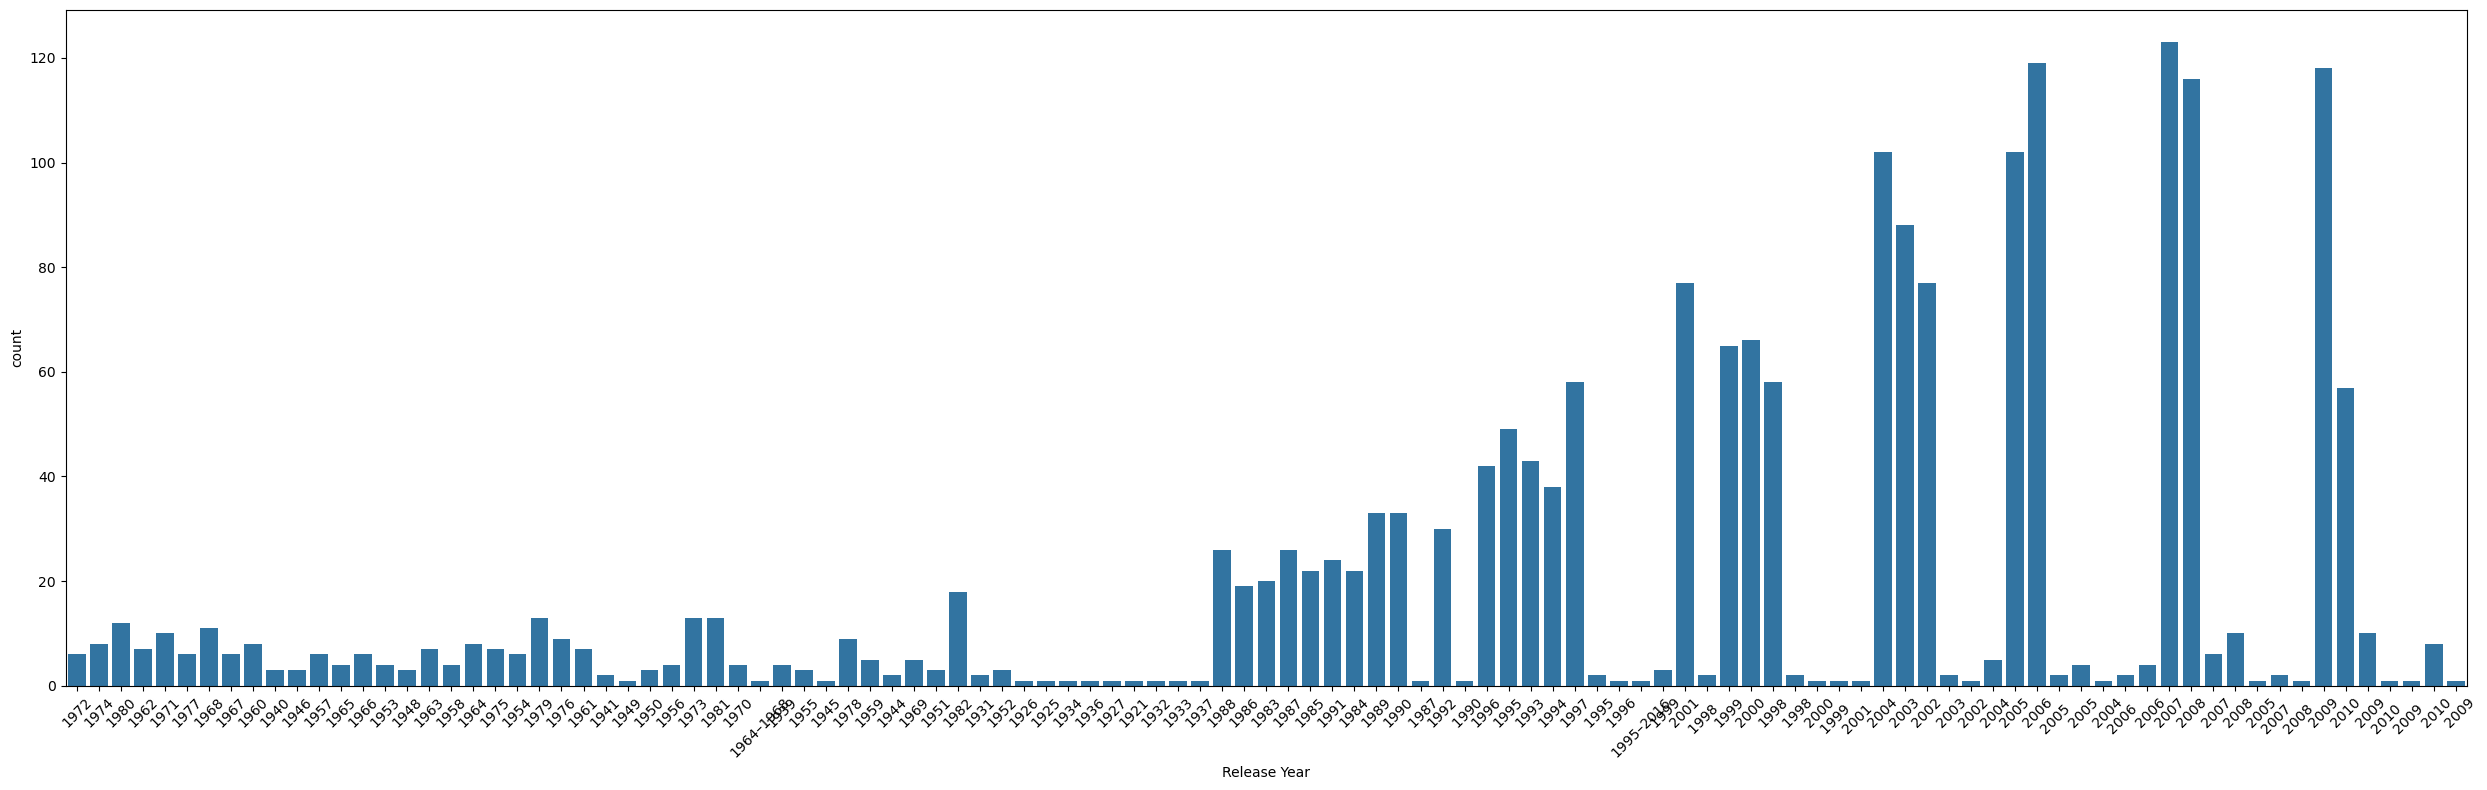

In [31]:
plt.figure(figsize=(25,8))
sns.countplot(x=df['Release Year'])
plt.xticks(rotation=45);
plt.tight_layout()

In [32]:
sort_value=df.sort_values(by=['Gross'],ascending=False)[['Movie Name','Gross']].head(10)

sort_value

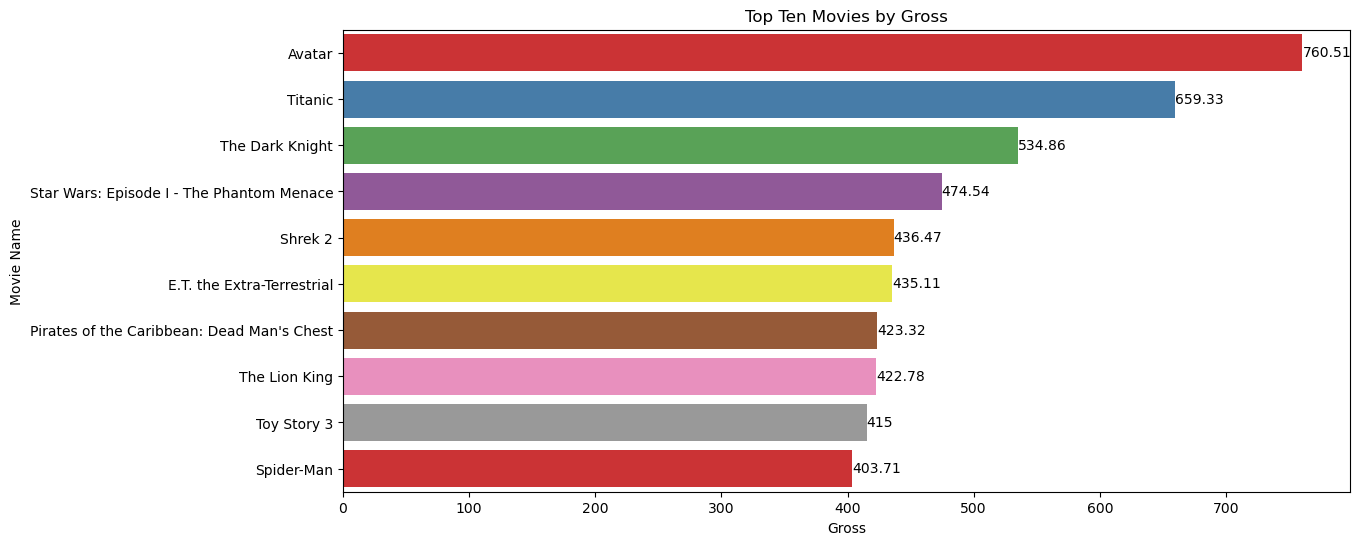

In [33]:
plt.figure(figsize=(13,6))
ax=sns.barplot(data=sort_value,x='Gross',y='Movie Name',palette='Set1')
plt.title('Top Ten Movies by Gross')
for i in ax.containers:
    ax.bar_label(i)

In [34]:
year=df['Release Year'].value_counts().head(10)

In [35]:
name=year.index
count=year.values

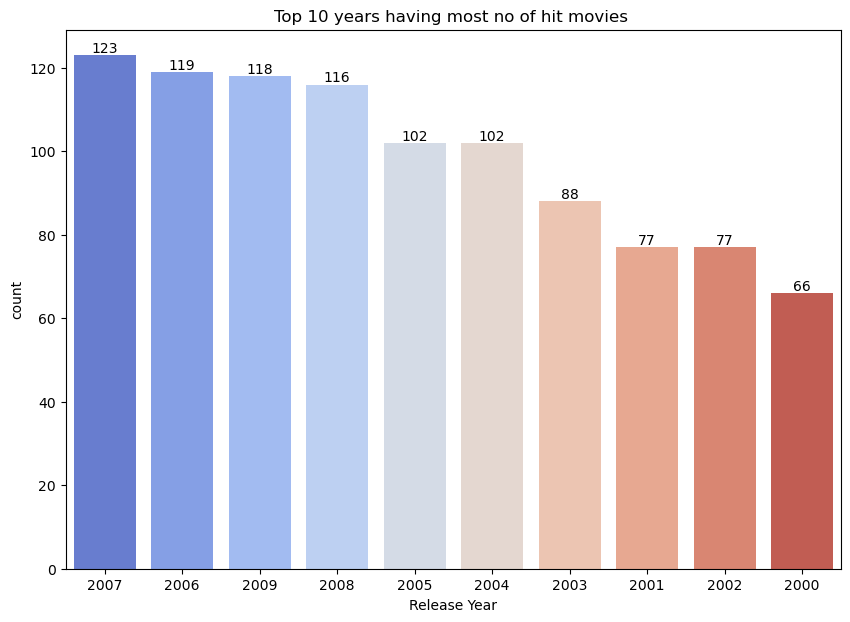

In [36]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=name,y=count,palette='coolwarm')
plt.title('Top 10 years having most no of hit movies ')
plt.ylabel('count')
for i in ax.containers:
    ax.bar_label(i)

In [37]:
yr_gr=df.sort_values(by='Gross',ascending=False).head(15)[['Release Year','Gross']]

Text(0, 0.5, 'Gross total in million')

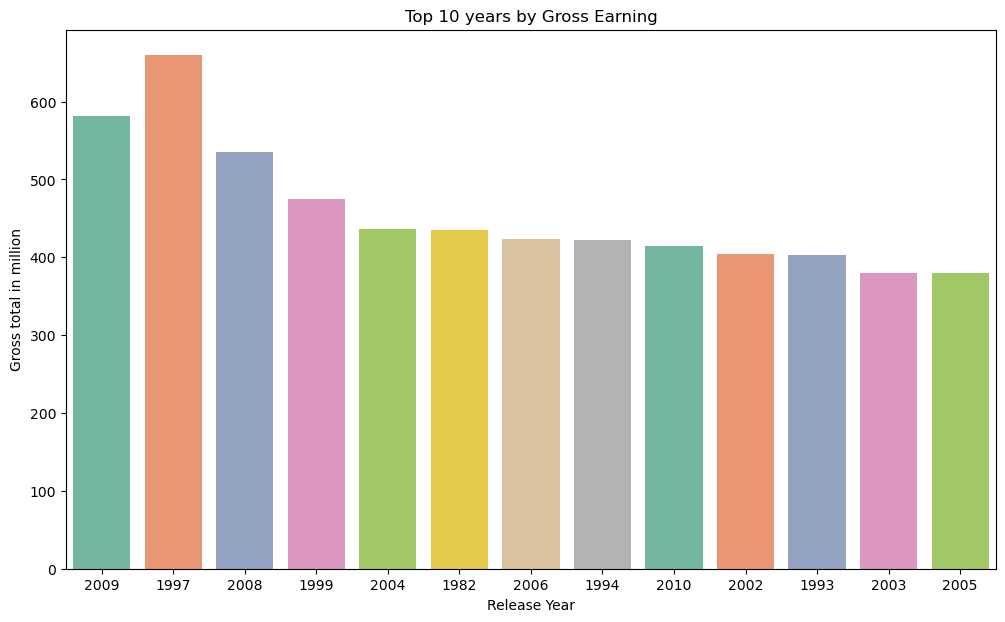

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(data=yr_gr,x='Release Year',y='Gross',palette='Set2',errorbar=None)
plt.title('Top 10 years by Gross Earning')
plt.ylabel('Gross total in million')

In [39]:
rating=df.sort_values(by='IMDB Rating',ascending=False).head(10)[['Movie Name','IMDB Rating']]

Text(0.5, 1.0, 'Top 10 Movies by IMDB Rating')

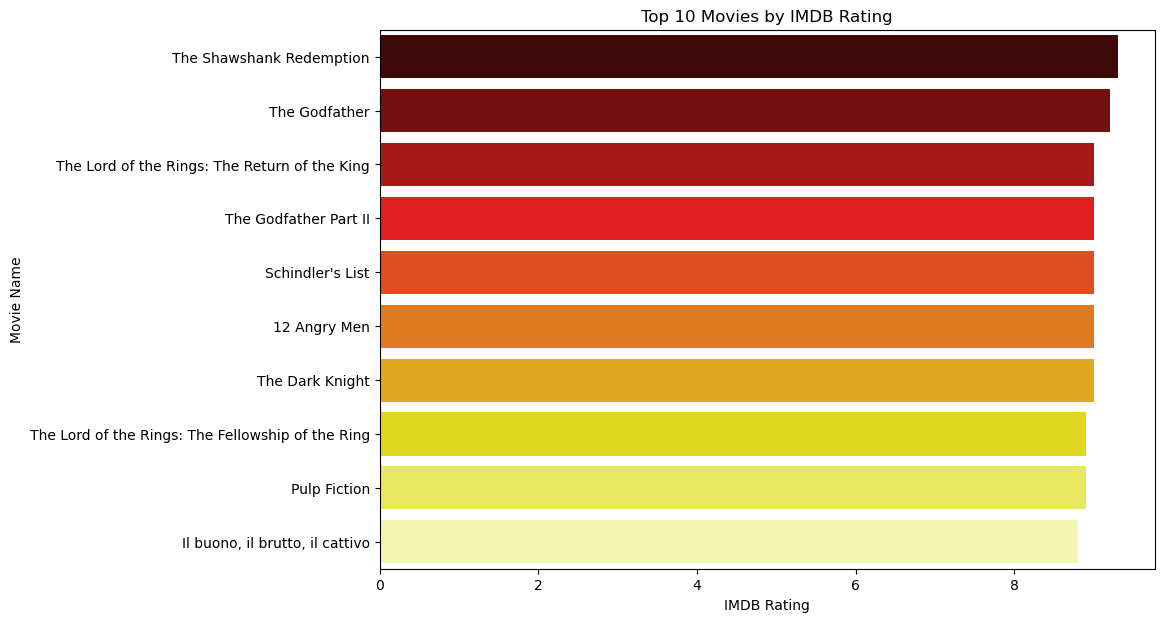

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(data=rating,x='IMDB Rating',y='Movie Name',palette='hot')
plt.title('Top 10 Movies by IMDB Rating')

Text(0.5, 1.0, 'Duration')

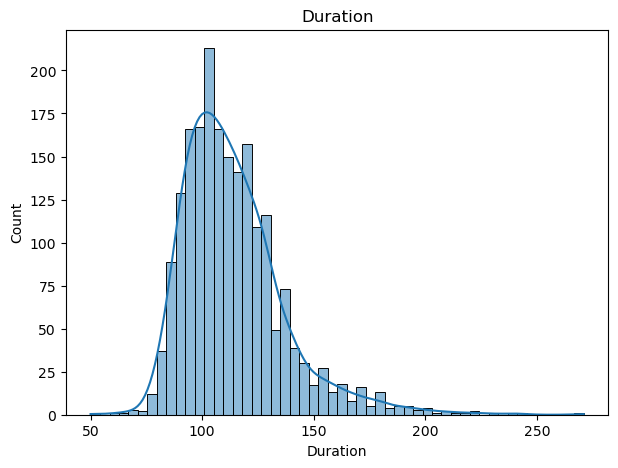

In [41]:
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='Duration',kde=True)
plt.title('Duration')

In [42]:
gx=df['Genre'].value_counts().head(10).index
gy=df['Genre'].value_counts().head(10).values



Text(0.5, 1.0, 'Top 10 Genre')

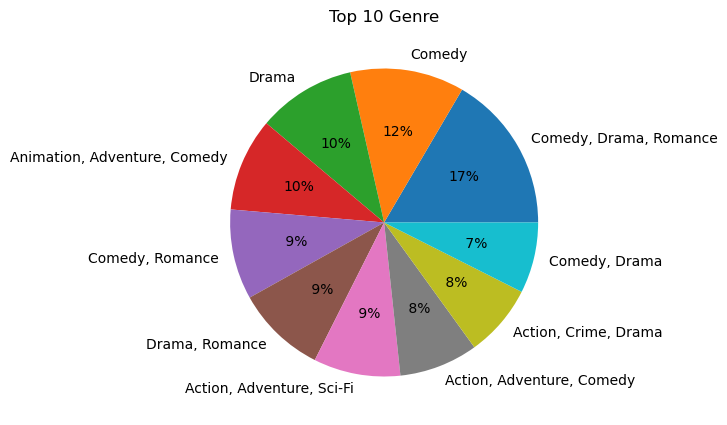

In [43]:
plt.figure(figsize=(7,5))
plt.pie(gy,labels=gx,autopct='%2.f%%');
plt.title('Top 10 Genre')

In [44]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [45]:
df1=df.drop(columns=['Movie Name','Director','Cast'],inplace=True)

In [46]:
df.head()

,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Gross
0,1972,175,9.2,100.0,2002655,"Crime, Drama",134.97
1,1974,202,9.0,90.0,1358608,"Crime, Drama",57.30
2,1980,124,7.7,86.0,56476,Drama,54.80
3,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",44.82
4,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",44.82


In [47]:
df.loc[569]

Release Year    1995–2016
Duration               60
IMDB Rating           7.2
Metascore            61.0
Votes               11871
Genre              Comedy
Gross               44.82
Name: 569, dtype: object

In [48]:
df['Release Year']=df['Release Year'].str.replace('–','')

In [49]:
df['Release Year'].astype('int')

0       1972
1       1974
2       1980
3       1962
4       1971
        ... 
1995    2009
1996    2010
1997    2009
1998    2009
1999    2008
Name: Release Year, Length: 2000, dtype: int32

In [50]:
cluster=KMeans(n_clusters=5)
labels=cluster.fit_predict(df)

ValueError: could not convert string to float: 'Crime, Drama'

In [ ]:
labels

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Gross'],df['IMDB Rating'],c=labels)

In [ ]:
clust=AgglomerativeClustering(n_clusters=5,linkage='average',metric='euclidean')
label=clust.fit_predict(df)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Gross'],df['IMDB Rating'],c=label)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Metascore'],df['IMDB Rating'],c=labels)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Metascore'],df['Votes'],c=labels)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Release Year'],df['Gross'],c=labels)

In [66]:
df.head()

,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Gross,Action,Adventure,Biography,...,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Sci-Fi,Thriller,Western
0,1972,175,9.2,100.0,2002655,"[Crime, Drama]",134.97,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1974,202,9.0,90.0,1358608,"[Crime, Drama]",57.30,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1980,124,7.7,86.0,56476,[Drama],54.80,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1962,218,8.3,100.0,313044,"[Adventure, Biography, Drama]",44.82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1971,113,7.4,73.0,64331,"[Crime, Drama, Thriller]",44.82,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df['Genre']=df['Genre'].str.split(',')

In [52]:
from mlxtend.preprocessing import TransactionEncoder

In [55]:
encoder=TransactionEncoder()
array=encoder.fit_transform(df['Genre'])

In [56]:
array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [57]:
df_dummies=pd.DataFrame(array,columns=encoder.columns_)

In [62]:
df_dummies

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Sci-Fi,Thriller,Western
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df=pd.concat([df,df_dummies],axis=1)

In [60]:
df.head()

,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Gross,Action,Adventure,Biography,...,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Sci-Fi,Thriller,Western
0,1972,175,9.2,100.0,2002655,"[Crime, Drama]",134.97,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1974,202,9.0,90.0,1358608,"[Crime, Drama]",57.30,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1980,124,7.7,86.0,56476,[Drama],54.80,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1962,218,8.3,100.0,313044,"[Adventure, Biography, Drama]",44.82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1971,113,7.4,73.0,64331,"[Crime, Drama, Thriller]",44.82,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df.columns

Index(['Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes',
       'Genre', 'Gross', ' Action', ' Adventure', ' Biography', ' Comedy',
       ' Crime', ' Drama', ' Family', ' Fantasy', ' Film-Noir', ' History',
       ' Horror', ' Music', ' Musical', ' Mystery', ' Romance', ' Sci-Fi',
       ' Sport', ' Thriller', ' War', ' Western', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Mystery', 'Sci-Fi',
       'Thriller', 'Western'],
      dtype='object')